In [3]:
import pandas as pd
import numpy as np
from datetime import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl
from IPython.display import set_matplotlib_formats
set_matplotlib_formats("retina")
pd.set_option('mode.chained_assignment',None)
plt.rc("font", family="Malgun Gothic")
plt.rc("axes", unicode_minus=False)

##1. 코로나 전후 자전거와 대중교통 비교

In [6]:
#19년도 도로데이터 가져오기
road19 = pd.read_csv("data\\자전거도로(2019).csv",encoding= 'UTF8')
#20년도 도로데이터 가져오기
road20 = pd.read_csv("data\\자전거도로(2020).csv",encoding= 'UTF8')

In [7]:
#필요한 컬럼명 출력
road19 = road19[["자전거전용도로","자전거전용도로.1","자전거보행자겸용도로","자전거보행자겸용도로.1","자전거우선도로","자전거우선도로.1"]]
#컬럼명을 알아보기 쉽게 변환
road19 = road19.rename({"자전거전용도로":"자전거전용도로 구간","자전거전용도로.1":"자전거전용도로 길이","자전거보행자겸용도로":"자전거보행자겸용도로 구간","자전거보행자겸용도로.1":"자전거보행자겸용도로 길이","자전거우선도로":"자전거우선도로 구간","자전거우선도로.1":"자전거우선도로 길이"},axis="columns")
road19

,자전거전용도로 구간,자전거전용도로 길이,자전거보행자겸용도로 구간,자전거보행자겸용도로 길이,자전거우선도로 구간,자전거우선도로 길이
0,-,-,6,5.9,8,6.9
1,-,-,2,2.4,9,12.3
2,3,2,11,10.6,5,10.1
3,2,0.6,10,9.2,7,5.3
4,1,0.4,18,25.1,3,3.8
5,3,1.1,10,7.0,7,14.4
6,4,3.2,5,3.4,-,-
7,1,0.3,5,4.7,1,0.3
8,-,-,1,2.7,-,-
9,1,0.7,3,11.6,-,-


In [8]:
#각 컬럼의 자료형 확인
type("자전거전용도로 구간")
type("자전거전용도로 길이")
type("자전거보행자겸용도로 구간")
type("자전거보행자겸용도로 길이")
type("자전거우선도로 구간")
type("자전거우선도로 길이")

str

In [9]:
#합계를 위하여 문자형 변수를 실수형 변수로 변환
road19["자전거전용도로 구간"]=pd.to_numeric(road19["자전거전용도로 구간"],errors="coerce")
road19["자전거전용도로 길이"]=pd.to_numeric(road19["자전거전용도로 길이"],errors="coerce")
road19["자전거보행자겸용도로 구간"]=pd.to_numeric(road19["자전거보행자겸용도로 구간"],errors="coerce")
road19["자전거보행자겸용도로 길이"]=pd.to_numeric(road19["자전거보행자겸용도로 길이"],errors="coerce")
road19["자전거우선도로 구간"]=pd.to_numeric(road19["자전거우선도로 구간"],errors="coerce")
road19["자전거우선도로 길이"]=pd.to_numeric(road19["자전거우선도로 길이"],errors="coerce")
road19.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   자전거전용도로 구간     20 non-null     float64
 1   자전거전용도로 길이     20 non-null     float64
 2   자전거보행자겸용도로 구간  25 non-null     int64  
 3   자전거보행자겸용도로 길이  25 non-null     float64
 4   자전거우선도로 구간     14 non-null     float64
 5   자전거우선도로 길이     14 non-null     float64
dtypes: float64(5), int64(1)
memory usage: 1.3 KB


In [10]:
#공백값을 0으로 변환 후 null 값 개수 확인
road19 = road19.fillna(0)
road19.isnull().sum()

자전거전용도로 구간       0
자전거전용도로 길이       0
자전거보행자겸용도로 구간    0
자전거보행자겸용도로 길이    0
자전거우선도로 구간       0
자전거우선도로 길이       0
dtype: int64

In [22]:
#각 도로 구간 및 길이별 합계 지정
road19_sum=road19.sum()
road19_sum=pd.DataFrame(road19_sum)
road19_sum.rename(columns = {0:'합계'}, inplace=True)
road19_sum

,합계
자전거전용도로 구간,86.0
자전거전용도로 길이,98.4
자전거보행자겸용도로 구간,309.0
자전거보행자겸용도로 길이,395.1
자전거우선도로 구간,103.0
자전거우선도로 길이,111.0


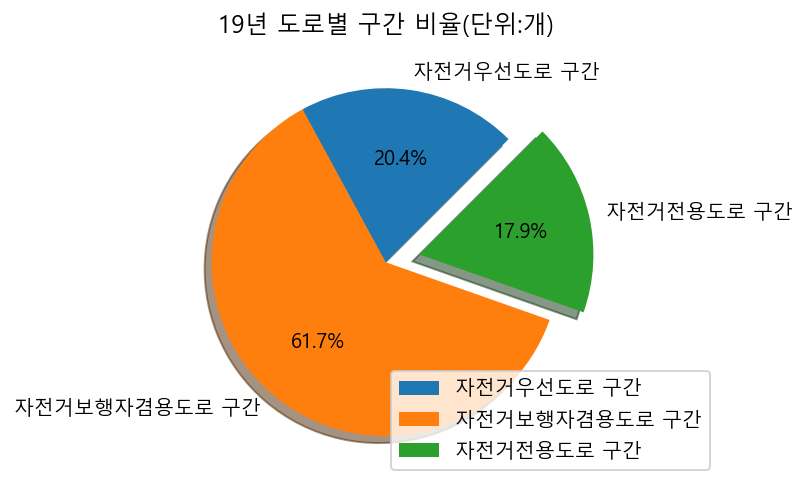

In [12]:
#19년도 도로별 구간 비율 파이차트 생성
road19_1 =  [97,293,85]
road19_1_1 = ["자전거우선도로 구간","자전거보행자겸용도로 구간","자전거전용도로 구간"] 
plt.axis("equal")
plt.pie(road19_1,labels=road19_1_1,radius=1.0,autopct="%0.1f%%",shadow=True,explode=[0,0,0.2],startangle=45)
plt.legend(road19_1_1, loc="lower right")
plt.title("19년 도로별 구간 비율(단위:개)")
plt.show()

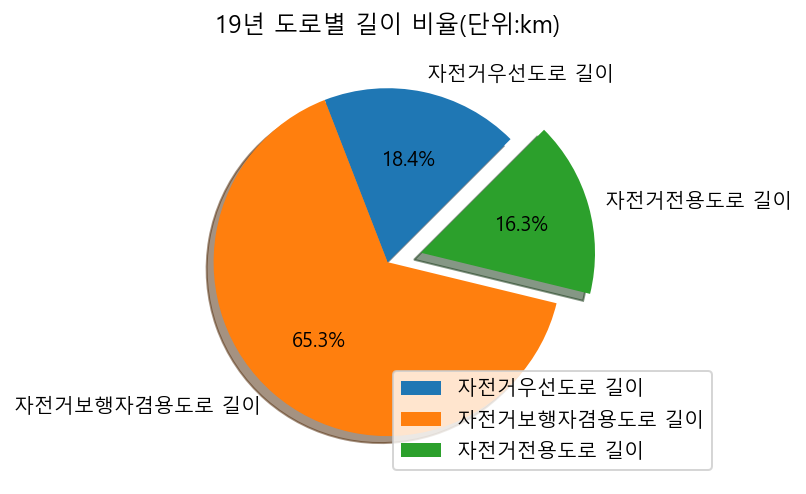

In [13]:
#19년도 도로별 길이 비율 파이차트 생성
road19_2 =  [111,394.4,98.4]
road19_2_1 = ["자전거우선도로 길이","자전거보행자겸용도로 길이","자전거전용도로 길이"] 
plt.axis("equal")
plt.pie(road19_2,labels=road19_2_1,radius=1.0,autopct="%0.1f%%",shadow=True,explode=[0,0,0.2],startangle=45)
plt.legend(road19_2_1, loc="lower right")
plt.title("19년 도로별 길이 비율(단위:km)")
plt.show()

In [14]:
#2020년 데이터 전처리
#필요한 컬럼명 출력
road20 = road20[["자전거전용도로","자전거전용도로.1","자전거보행자겸용도로","자전거보행자겸용도로.1","자전거우선도로","자전거우선도로.1"]]
road20
#컬럼명을 알아보기 쉽게 변환
road20 = road20.rename({"자전거전용도로":"자전거전용도로 구간","자전거전용도로.1":"자전거전용도로 길이","자전거보행자겸용도로":"자전거보행자겸용도로 구간","자전거보행자겸용도로.1":"자전거보행자겸용도로 길이","자전거우선도로":"자전거우선도로 구간","자전거우선도로.1":"자전거우선도로 길이"},axis="columns")
road20

,자전거전용도로 구간,자전거전용도로 길이,자전거보행자겸용도로 구간,자전거보행자겸용도로 길이,자전거우선도로 구간,자전거우선도로 길이
0,-,-,9,9.5,16,10.2
1,-,-,4,4.6,14,10.7
2,5,2,11,10.6,10,20.4
3,1,0.3,18,16.9,9,8
4,1,0.2,43,41.7,5,4.6
5,4,1.4,12,7.6,14,28.8
6,7,3.5,9,6.5,-,-
7,5,2.7,5,4.7,1,0.3
8,-,-,3,3.2,-,-
9,2,1.4,6,11.5,-,-


In [15]:
#각 컬럼의 자료형 확인
type("자전거전용도로 구간")
type("자전거전용도로 길이")
type("자전거보행자겸용도로 구간")
type("자전거보행자겸용도로 길이")
type("자전거우선도로 구간")
type("자전거우선도로 길이")

str

In [16]:
#합계를 위해 문자형 컬럼을 실수형 컬럼으로 변환
road20["자전거전용도로 구간"]=pd.to_numeric(road20["자전거전용도로 구간"],errors="coerce")
road20["자전거전용도로 길이"]=pd.to_numeric(road20["자전거전용도로 길이"],errors="coerce")
road20["자전거보행자겸용도로 구간"]=pd.to_numeric(road20["자전거보행자겸용도로 구간"],errors="coerce")
road20["자전거보행자겸용도로 길이"]=pd.to_numeric(road20["자전거보행자겸용도로 길이"],errors="coerce")
road20["자전거우선도로 구간"]=pd.to_numeric(road20["자전거우선도로 구간"],errors="coerce")
road20["자전거우선도로 길이"]=pd.to_numeric(road20["자전거우선도로 길이"],errors="coerce")
road20.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   자전거전용도로 구간     19 non-null     float64
 1   자전거전용도로 길이     19 non-null     float64
 2   자전거보행자겸용도로 구간  25 non-null     int64  
 3   자전거보행자겸용도로 길이  25 non-null     float64
 4   자전거우선도로 구간     14 non-null     float64
 5   자전거우선도로 길이     14 non-null     float64
dtypes: float64(5), int64(1)
memory usage: 1.3 KB


In [17]:
#공백값을 0으로 치환한 후 null값 개수 확인
road20 = road20.fillna(0)
road20.isnull().sum()

자전거전용도로 구간       0
자전거전용도로 길이       0
자전거보행자겸용도로 구간    0
자전거보행자겸용도로 길이    0
자전거우선도로 구간       0
자전거우선도로 길이       0
dtype: int64

In [21]:
#각 도로별 구간 및 길이 합계 출력
road20_sum=road20.sum()
road20_sum=pd.DataFrame(road20_sum)
road20_sum.rename(columns = {0:'합계'}, inplace=True)
road20_sum

,합계
자전거전용도로 구간,184.0
자전거전용도로 길이,138.6
자전거보행자겸용도로 구간,638.0
자전거보행자겸용도로 길이,574.4
자전거우선도로 구간,170.0
자전거우선도로 길이,191.4


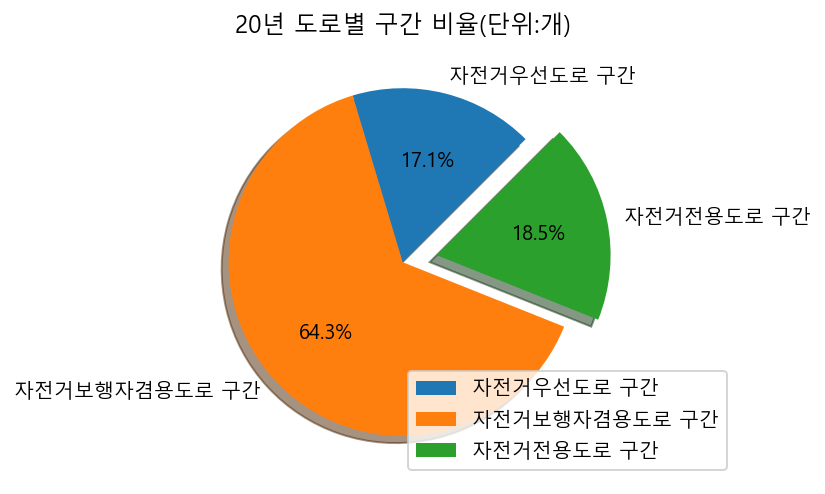

In [19]:
#20년 도로별 구간 비율 파이차트 출력
road20_1 =  [170,638,184]
road20_1_1 = ["자전거우선도로 구간","자전거보행자겸용도로 구간","자전거전용도로 구간"] 
plt.axis("equal")
plt.pie(road20_1,labels=road20_1_1,radius=1.0,autopct="%0.1f%%",shadow=True,explode=[0,0,0.2],startangle=45)
plt.legend(road20_1_1, loc="lower right")
plt.title("20년 도로별 구간 비율(단위:개)")
plt.show()

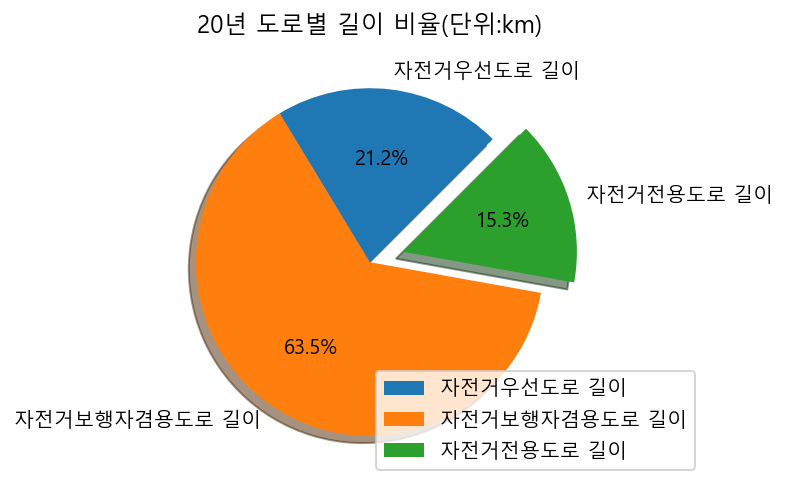

In [23]:
#20년 도로별 길이 비율 파이차트 출력
road20_2 =  [191.4,574.4,138.6]
road20_2_1 = ["자전거우선도로 길이","자전거보행자겸용도로 길이","자전거전용도로 길이"] 
plt.axis("equal")
plt.pie(road20_2,labels=road20_2_1,radius=1.0,autopct="%0.1f%%",shadow=True,explode=[0,0,0.2],startangle=45)
plt.legend(road20_2_1, loc="lower right")
plt.title("20년 도로별 길이 비율(단위:km)")
plt.show()

In [25]:
#각 도로별 구간 및 길이의 합계를 연도별 출력
road19_sum["20년"] = road20_sum['합계']
road19_sum.rename(columns={'합계':"19년"},
                 inplace=True)
road19_sum

,19년,20년
자전거전용도로 구간,86.0,184.0
자전거전용도로 길이,98.4,138.6
자전거보행자겸용도로 구간,309.0,638.0
자전거보행자겸용도로 길이,395.1,574.4
자전거우선도로 구간,103.0,170.0
자전거우선도로 길이,111.0,191.4


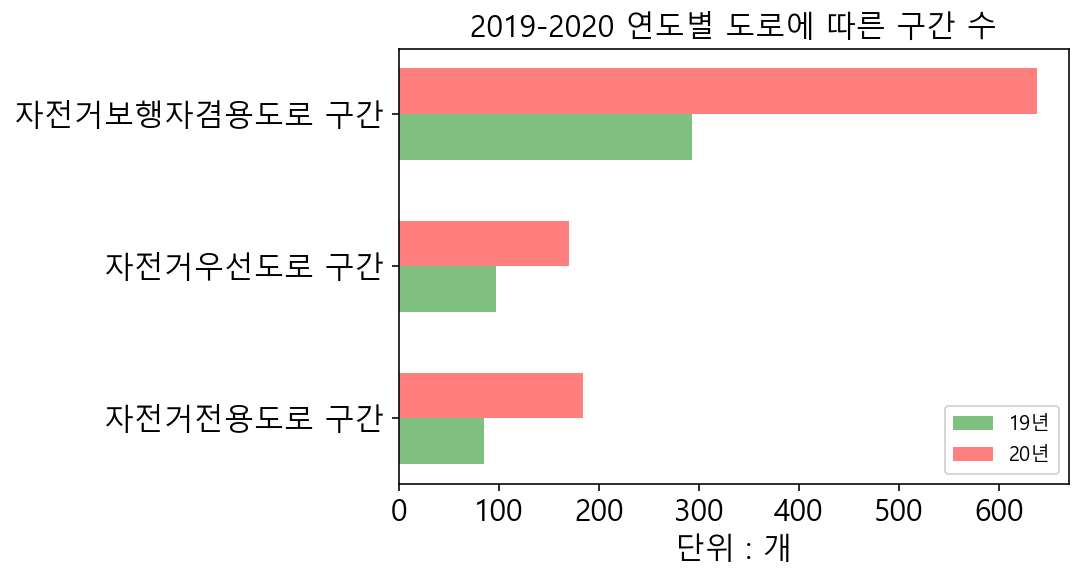

In [26]:
labels = ["자전거전용도로 구간","자전거우선도로 구간","자전거보행자겸용도로 구간"]

x = np.arange(len(labels))

count_1 = [85,97,293]
count_2 = [184,170,638]

width = 0.3

fig,axes = plt.subplots()

axes.barh(x-width/2,count_1,width,align="center",color="green",alpha=0.5)
axes.barh(x+width/2,count_2,width,align="center",color="red",alpha=0.5)

plt.xticks(fontsize=15)
plt.yticks(x)
axes.set_yticklabels(labels,fontsize=15)
plt.legend(["19년","20년"])
plt.xlabel("단위 : 개",fontsize=15)
plt.title('2019-2020 연도별 도로에 따른 구간 수', fontsize=15)
plt.show()

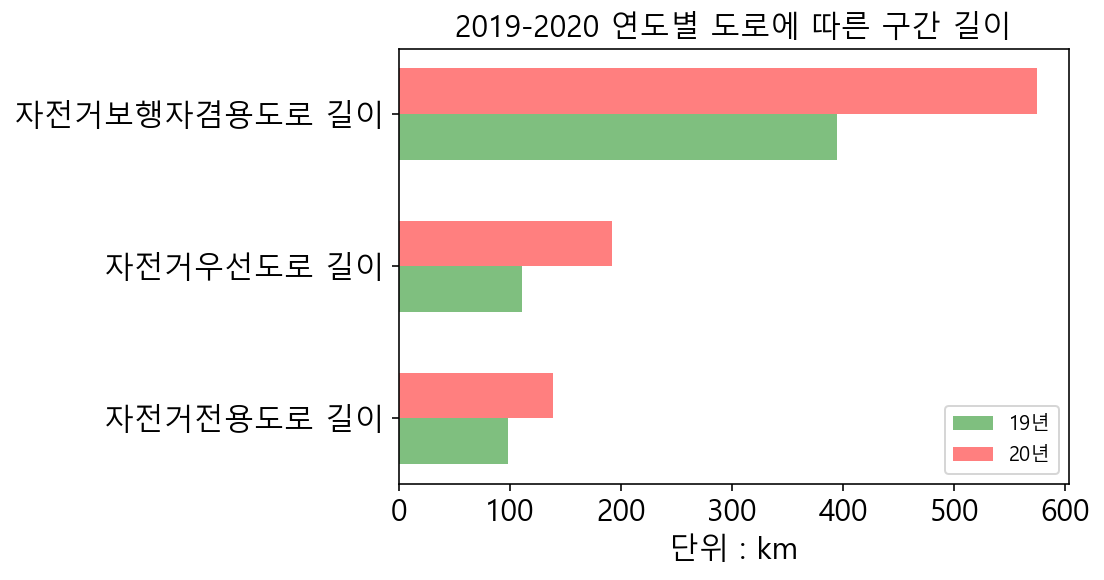

In [27]:
labels = ["자전거전용도로 길이","자전거우선도로 길이","자전거보행자겸용도로 길이"]

x = np.arange(len(labels))

count_1 = [98.4,111,394.4]
count_2 = [138.5,191.5,574.3]

width = 0.3

fig,axes = plt.subplots()

axes.barh(x-width/2,count_1,width,align="center",color="green",alpha=0.5)
axes.barh(x+width/2,count_2,width,align="center",color="red",alpha=0.5)

plt.xticks(fontsize = 15)
plt.yticks(x)
axes.set_yticklabels(labels,fontsize=15)
plt.legend(["19년","20년"])
plt.xlabel("단위 : km",fontsize=15)
plt.title('2019-2020 연도별 도로에 따른 구간 길이', fontsize=15)
plt.show()

##2. 코로나 전후 자전거와 대중교통 비교

In [28]:
#2019 2021 지하철 데이터
#2021 1월부터 7월까지 지하철 월별 승하차총승객수 데이터 
df1= pd.read_csv("data\CARD_SUBWAY_MONTH_202101.csv",encoding= 'UTF8',index_col=False)
df2= pd.read_csv("data\CARD_SUBWAY_MONTH_202102.csv",encoding= 'UTF8',index_col=False)
df3= pd.read_csv("data\CARD_SUBWAY_MONTH_202103.csv",encoding= 'UTF8',index_col=False)
df4= pd.read_csv("data\CARD_SUBWAY_MONTH_202104.csv",encoding= 'UTF8',index_col=False)
df5= pd.read_csv("data\CARD_SUBWAY_MONTH_202105.csv",encoding= 'UTF8',index_col=False)
df6= pd.read_csv("data\CARD_SUBWAY_MONTH_202106.csv",encoding= 'UTF8',index_col=False)
df7= pd.read_csv("data\CARD_SUBWAY_MONTH_202107 (1).csv",encoding= 'UTF8',index_col=False)

#2019년 1월부터 7월까지 지하철 데이터 가져오기
ab1= pd.read_csv("data\CARD_SUBWAY_MONTH_201901.csv",encoding= 'cp949',index_col=False)
ab2= pd.read_csv("data\CARD_SUBWAY_MONTH_201902.csv",encoding= 'cp949',index_col=False)
ab3= pd.read_csv("data\CARD_SUBWAY_MONTH_201903.csv",encoding= 'cp949',index_col=False)
ab4= pd.read_csv("data\CARD_SUBWAY_MONTH_201904.csv",encoding= 'cp949',index_col=False)
ab5= pd.read_csv("data\CARD_SUBWAY_MONTH_201905.csv",encoding= 'cp949',index_col=False)
ab6= pd.read_csv("data\CARD_SUBWAY_MONTH_201906.csv",encoding= 'cp949',index_col=False)
ab7= pd.read_csv("data\CARD_SUBWAY_MONTH_201907.csv",encoding= 'cp949',index_col=False)

In [29]:
#2021년 1월부터 7월까지 지하칠 데이터 합치기
df = pd.concat([df1, df2, df3, df4, df5, df6, df7])
df

#2019년1월부터 7월까지 지하칠 데이터 합치기
ab= pd.concat([ab1, ab2, ab3, ab4, ab5, ab6, ab7])
ab

,사용일자,노선명,역명,승차총승객수,하차총승객수,등록일자
0,20190101,2호선,을지로4가,3862.0,3728.0,20190104
1,20190101,2호선,을지로3가,8104.0,7554.0,20190104
2,20190101,2호선,을지로입구,22478.0,21330.0,20190104
3,20190101,2호선,시청,8381.0,6049.0,20190104
4,20190101,1호선,동묘앞,8045.0,8504.0,20190104
...,...,...,...,...,...,...
18300,20190731,우이신설선,북한산보국문,5662.0,5145.0,20190803
18301,20190731,우이신설선,정릉,4282.0,3768.0,20190803
18302,20190731,우이신설선,성신여대입구(돈암),3465.0,3854.0,20190803
18303,20190731,우이신설선,보문,1500.0,1599.0,20190803


In [30]:
df.shape

(127184, 6)

In [31]:
#사용일자 데이터 datetime으로 바꾸기
df["사용일자"]=pd.to_datetime(df["사용일자"],format='%Y%m%d')
df["사용일자"]

#사용일자 데이터 datetime으로 바꾸기
ab["사용일자"]=pd.to_datetime(ab["사용일자"],format='%Y%m%d')
ab["사용일자"]

0       2019-01-01
1       2019-01-01
2       2019-01-01
3       2019-01-01
4       2019-01-01
           ...    
18300   2019-07-31
18301   2019-07-31
18302   2019-07-31
18303   2019-07-31
18304   2019-07-31
Name: 사용일자, Length: 125333, dtype: datetime64[ns]

In [32]:
#월별 데이터만 보기
df["월"] = df["사용일자"].dt.month
df["월"]

#월별 데이터만 보기
ab["월"] = ab["사용일자"].dt.month

In [33]:
df

,사용일자,노선명,역명,승차총승객수,하차총승객수,등록일자,월
0,2021-01-01,일산선,백석,2724,2825,20210104,1
1,2021-01-01,일산선,마두,1638,1652,20210104,1
2,2021-01-01,3호선,을지로3가,1024,1009,20210104,1
3,2021-01-01,3호선,종로3가,1255,1632,20210104,1
4,2021-01-01,3호선,안국,2934,3029,20210104,1
...,...,...,...,...,...,...,...
18627,2021-07-31,경원선,청량리(서울시립대입구),11320,13138,20210803,7
18628,2021-07-31,경원선,외대앞,4261,4279,20210803,7
18629,2021-07-31,경원선,신이문,4666,4313,20210803,7
18630,2021-07-31,2호선,용두(동대문구청),1292,1364,20210803,7


In [34]:
#월별 승차총승객수 가져오기
subway2021 = pd.pivot_table(df, index=["월"], values=["승차총승객수"], aggfunc="sum")
subway2021

,승차총승객수
월,
1,142681454
2,143511591
3,179708599
4,178281382
5,174779766
6,179665956
7,160193504


In [35]:
#지하철 월별 승차총승객수의 합
subway2019 = pd.pivot_table(ab, index=["월"], values=["승차총승객수"], aggfunc="sum")

<AxesSubplot:title={'center':'월별 지하철 승차총승객'}, xlabel='월', ylabel='승차총승객수'>

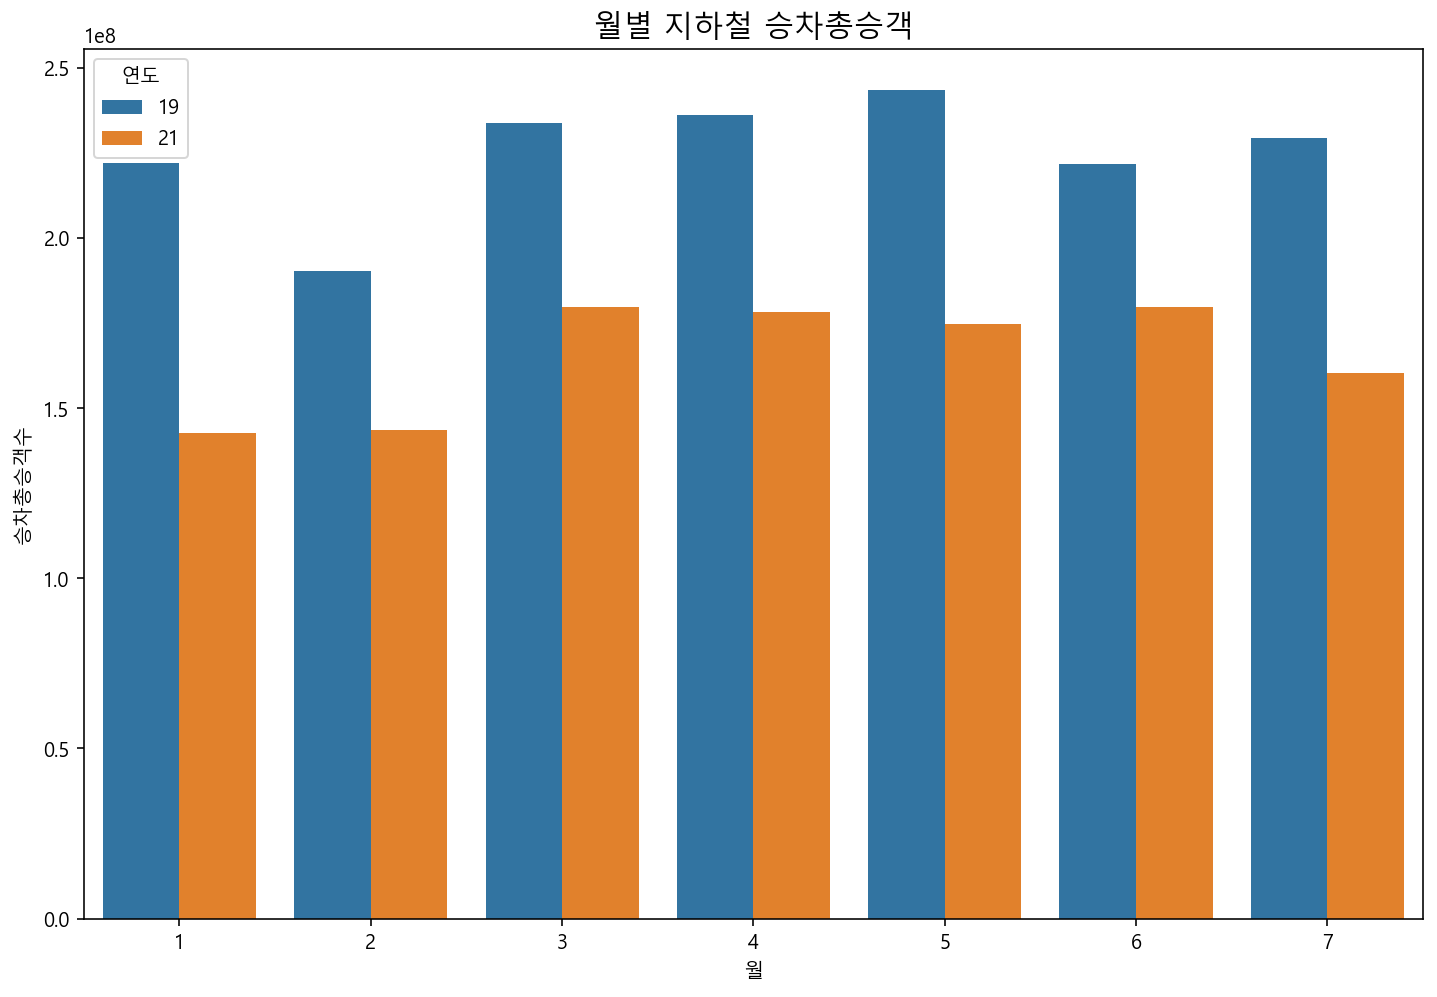

In [40]:
#21년도와 19년도 지하철 승차총승객 수 비교
board_sum_21 = pd.pivot_table(df, index=["월"], values=["승차총승객수"], aggfunc="sum").reset_index()
board_sum_19 = pd.pivot_table(ab, index=["월"], values=["승차총승객수"], aggfunc="sum").reset_index()
board_sum_21['연도'] = 21
board_sum_19['연도'] = 19
plt.figure(figsize=(12,8))
plt.title('월별 지하철 승차총승객', fontsize=15)
sns.barplot(x="월", y="승차총승객수", hue="연도", data=pd.concat([board_sum_21, board_sum_19]))

In [43]:
#2019 2021 버스데이터
#2019년 1월부터 7월까지 버스데이터 가져오기
bus1= pd.read_csv("data\BUS_STATION_BOARDING_MONTH_201901.csv",encoding= 'cp949',index_col=False)
bus2= pd.read_csv("data\BUS_STATION_BOARDING_MONTH_201902.csv",encoding= 'cp949',index_col=False)
bus3= pd.read_csv("data\BUS_STATION_BOARDING_MONTH_201903.csv",encoding= 'cp949',index_col=False)
bus4= pd.read_csv("data\BUS_STATION_BOARDING_MONTH_201904.csv",encoding= 'cp949',index_col=False)
bus5= pd.read_csv("data\BUS_STATION_BOARDING_MONTH_201905.csv",encoding= 'cp949',index_col=False)
bus6= pd.read_csv("data\BUS_STATION_BOARDING_MONTH_201906.csv",encoding= 'cp949',index_col=False)
bus7= pd.read_csv("data\BUS_STATION_BOARDING_MONTH_201907.csv",encoding= 'cp949',index_col=False)

#2021 1월부터 7월까지 버스데이터 가져오기
us1= pd.read_csv("data\BUS_STATION_BOARDING_MONTH_202101.csv",encoding= 'cp949',index_col=False)
us2= pd.read_csv("data\BUS_STATION_BOARDING_MONTH_202102.csv",encoding= 'cp949',index_col=False)
us3= pd.read_csv("data\BUS_STATION_BOARDING_MONTH_202103.csv",encoding= 'cp949',index_col=False)
us4= pd.read_csv("data\BUS_STATION_BOARDING_MONTH_202104.csv",encoding= 'cp949',index_col=False)
us5= pd.read_csv("data\BUS_STATION_BOARDING_MONTH_202105.csv",encoding= 'cp949',index_col=False)
us6= pd.read_csv("data\BUS_STATION_BOARDING_MONTH_202106.csv",encoding= 'cp949',index_col=False)
us7= pd.read_csv("data\BUS_STATION_BOARDING_MONTH_202107.csv",encoding= 'cp949',index_col=False)

In [44]:
#2019년 버스 데이터 합치기
bus = pd.concat([bus1, bus2, bus3, bus4, bus5, bus6, bus7])
print(bus.shape)

#2021 버스 데이터 합치기
us = pd.concat([us1, us2, us3, us4, us5, us6, us7])
print(us.shape)

(8118350, 8)
(8143867, 8)


In [45]:
#버스 사용일자 데이터 datetime으로 바꾸기
bus["사용일자"]=pd.to_datetime(bus["사용일자"],format='%Y%m%d')
bus["사용일자"]

#버스 사용일자 데이터 datetime으로 바꾸기
us["사용일자"]=pd.to_datetime(us["사용일자"],format='%Y%m%d')

In [46]:
#월별 데이터만 보기
bus["월"] = bus["사용일자"].dt.month
bus

#월별 데이터만 보기
us["월"] = us["사용일자"].dt.month
us

,사용일자,노선번호,노선명,버스정류장ARS번호,역명,승차총승객수,하차총승객수,등록일자,월
0,2021-01-01,100,100번(하계동~용산구청),11428,한성여객종점,12,0,20210104,1
1,2021-01-01,100,100번(하계동~용산구청),11374,서울시립북서울미술관,8,0,20210104,1
2,2021-01-01,100,100번(하계동~용산구청),11380,목련아파트상가,86,14,20210104,1
3,2021-01-01,100,100번(하계동~용산구청),11339,월계헬스케어센터,112,44,20210104,1
4,2021-01-01,100,100번(하계동~용산구청),01002,창경궁.서울대학교병원,21,23,20210104,1
...,...,...,...,...,...,...,...,...,...
1191177,2021-07-31,성북04,성북04(성신여대입구역~신설동역),08304,개운사입구,301,90,20210803,7
1191178,2021-07-31,5713,5713번(안양비산동차고지~신촌기차역),14201,광흥창역.서강동주민센터,117,15,20210803,7
1191179,2021-07-31,마포16,마포16(망원동~홍대정문),14220,합정역,149,974,20210803,7
1191180,2021-07-31,173,173번(월계동~연세대),14152,서울대동창회관,102,83,20210803,7


In [47]:
#월별 승차총승객수 데이터 가져오기
bus2019=pd.pivot_table(bus, index=["월"], values=["승차총승객수"], aggfunc="sum")
bus2019

#버스 월별 승차총승객수의 합
us2021=pd.pivot_table(us, index=["월"], values=["승차총승객수"], aggfunc="sum")
us2021

,승차총승객수
월,
1,101075639
2,101033362
3,125252413
4,123281759
5,121710916
6,126839257
7,119140719


<AxesSubplot:title={'center':'월별 버스 승차총승객'}, xlabel='월', ylabel='승차총승객수'>

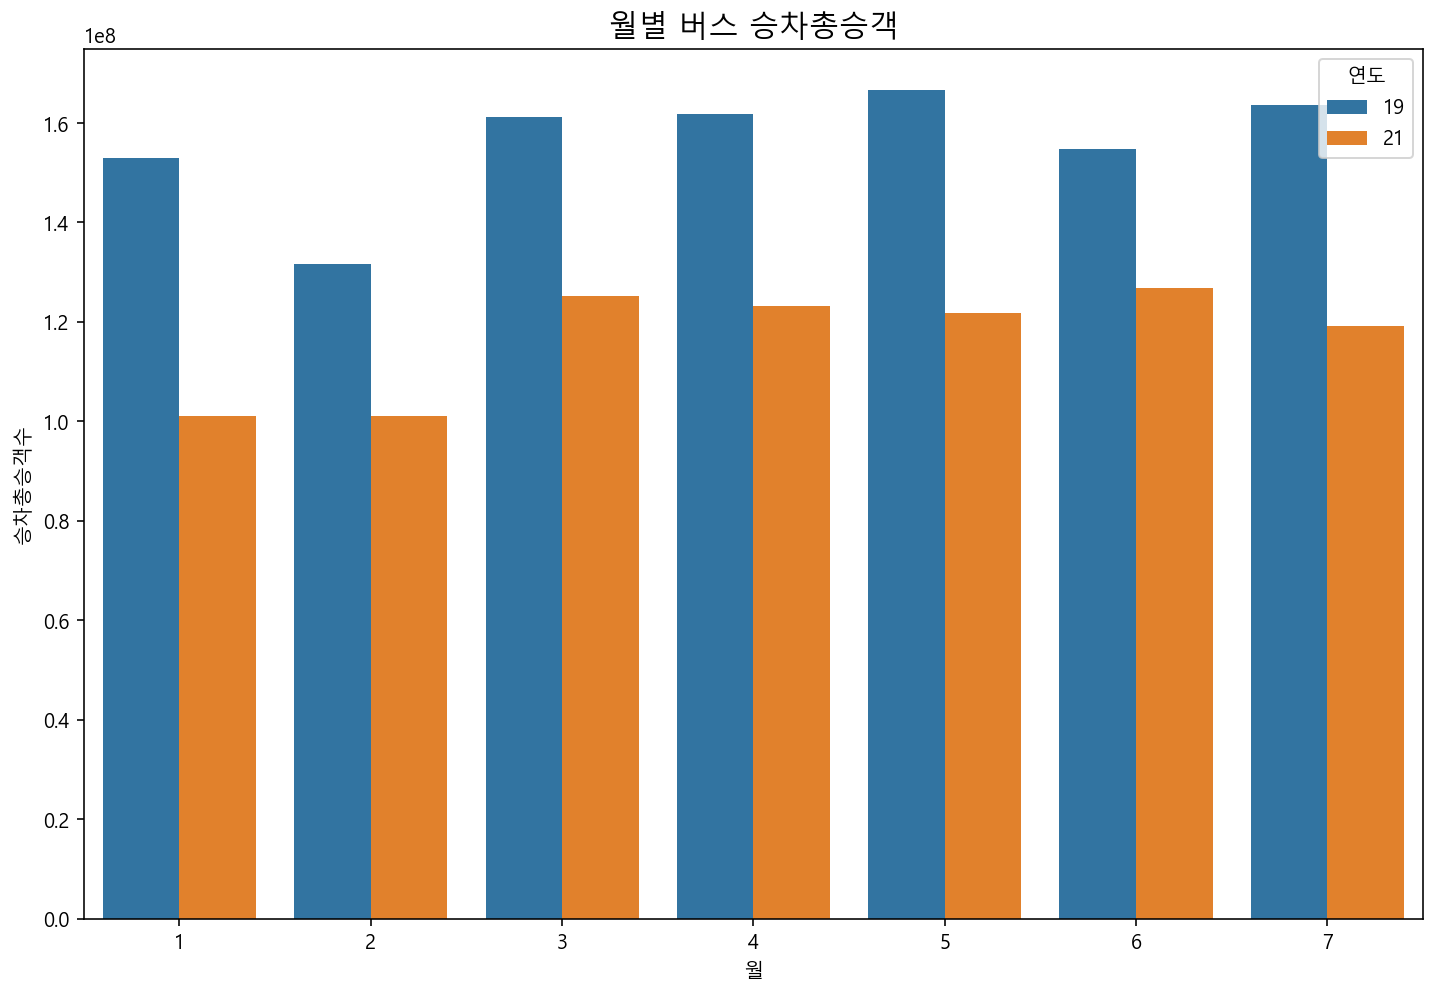

In [49]:
#21년도와 19년도 버스 승차인원수 비교
board_sum_21 = pd.pivot_table(us, index=["월"], values=["승차총승객수"], aggfunc="sum").reset_index()
board_sum_19 = pd.pivot_table(bus, index=["월"], values=["승차총승객수"], aggfunc="sum").reset_index()

board_sum_21['연도'] = 21
board_sum_19['연도'] = 19
plt.figure(figsize=(12,8))
plt.title('월별 버스 승차총승객', fontsize=15)
sns.barplot(x="월", y="승차총승객수", hue="연도", data=pd.concat([board_sum_21, board_sum_19]))

In [50]:
##2019 2021 공공자전거 데이터
#서울특별시 공공자전거 이용정보 데이터(2017-2021)
d1 = pd.read_csv('서울시 공공자전거 이용정보_2017_2021/공공자전거 이용정보(월별)_19.12.csv', encoding='cp949')
d2 = pd.read_csv('서울시 공공자전거 이용정보_2017_2021/공공자전거 이용정보(월별)_20.01_20.05.csv', encoding='cp949')
d3 = pd.read_csv('서울시 공공자전거 이용정보_2017_2021/공공자전거 이용정보(월별)_20.06.csv', encoding='cp949')
d4 = pd.read_csv('서울시 공공자전거 이용정보_2017_2021/공공자전거 이용정보(월별)_20.07_20.12.csv', encoding='cp949')
d5 = pd.read_csv('서울시 공공자전거 이용정보_2017_2021/공공자전거 이용정보(월별)_21.01.csv', encoding='cp949')
d6 = pd.read_csv('서울시 공공자전거 이용정보_2017_2021/공공자전거 이용정보(월별)_21.02-21.06.csv', encoding='cp949')
d7 = pd.read_csv('서울시 공공자전거 이용정보_2017_2021/서울특별시 공공자전거 이용정보(월별)_2017_1_12.csv', encoding='cp949')
d8 = pd.read_csv('서울시 공공자전거 이용정보_2017_2021/서울특별시 공공자전거 이용정보(월별)_2018_1_6.csv', encoding='cp949')
d9 = pd.read_csv('서울시 공공자전거 이용정보_2017_2021/서울특별시 공공자전거 이용정보(월별)_201807_201812.csv', encoding='cp949')
d10 = pd.read_csv('서울시 공공자전거 이용정보_2017_2021/서울특별시 공공자전거 이용정보(월별)_201901_201906.csv', encoding='cp949')
d11 = pd.read_csv('서울시 공공자전거 이용정보_2017_2021/서울특별시 공공자전거 이용정보(월별)_201907_201911.csv', encoding='cp949')

In [51]:
#불러온 데이터 확인
d1.columns
d1.head()

,대여일자,대여소번호,대여소명,대여구분코드,성별,연령대코드,이용건수,운동량,탄소량,이동거리,이용시간
0,Dec-19,3,중랑센터,일일(회원),M,AGE_003,7,1208.87,10.11,43610,118
1,Dec-19,3,중랑센터,일일(회원),M,AGE_004,2,0,0,0,10
2,Dec-19,3,중랑센터,정기,M,AGE_005,5,110.02,1.03,4410,99
3,Dec-19,5,상암센터 정비실,일일(회원),\N,AGE_005,1,0,0,0,8
4,Dec-19,5,상암센터 정비실,일일(회원),M,AGE_004,5,427.8,3.92,16880,205


In [52]:
#####2019 데이터 통합 전처리

#합치기 전 데이터 통일
#column name 통일(이동거리, 이용거리), 대여일자 데이터 형식 통일(대여일자)
for df in [d1,d10,d11]:
    print(df.columns)
    
d1.columns = d10.columns 

d1['대여일자'] = '2019-12'
d1.head()

Index(['대여일자', '대여소번호', '대여소명', '대여구분코드', '성별', '연령대코드', '이용건수', '운동량', '탄소량',
       '이동거리', '이용시간'],
      dtype='object')
Index(['대여일자', '대여소번호', '대여소', '대여구분코드', '성별', '연령대코드', '이용건수', '운동량', '탄소량',
       '이동거리(M)', '이동시간(분)'],
      dtype='object')
Index(['대여일자', '대여소번호', '대여소', '대여구분코드', '성별', '연령대코드', '이용건수', '운동량', '탄소량',
       '이동거리(M)', '이동시간(분)'],
      dtype='object')


,대여일자,대여소번호,대여소,대여구분코드,성별,연령대코드,이용건수,운동량,탄소량,이동거리(M),이동시간(분)
0,2019-12,3,중랑센터,일일(회원),M,AGE_003,7,1208.87,10.11,43610,118
1,2019-12,3,중랑센터,일일(회원),M,AGE_004,2,0,0,0,10
2,2019-12,3,중랑센터,정기,M,AGE_005,5,110.02,1.03,4410,99
3,2019-12,5,상암센터 정비실,일일(회원),\N,AGE_005,1,0,0,0,8
4,2019-12,5,상암센터 정비실,일일(회원),M,AGE_004,5,427.8,3.92,16880,205


In [53]:
#2019년 데이터 통합, null 값 확인
df_2019 = pd.concat([d1,d10,d11])
df_2019 = df_2019[['대여일자','대여소번호','연령대코드','이용건수','이동거리(M)','이동시간(분)']]
df_2019
df_2019[df_2019['이동거리(M)'].isnull()]
df_2019.isnull().sum()

대여일자       0
대여소번호      0
연령대코드      0
이용건수       0
이동거리(M)    0
이동시간(분)    0
dtype: int64

In [54]:
#연령대 코드 직관적으로 변경-labmda식 사용
keys = df_2019.연령대코드.unique()
values = ['10s','20s','30s','40s','50s','60s','70s','etc']
dic = dict(zip(keys,values))
dic
df_2019['연령대코드'] = df_2019.연령대코드.apply(lambda x: dic[x])
df_2019

,대여일자,대여소번호,연령대코드,이용건수,이동거리(M),이동시간(분)
0,2019-12,3,10s,7,43610,118
1,2019-12,3,20s,2,0,10
2,2019-12,3,30s,5,4410,99
3,2019-12,5,30s,1,0,8
4,2019-12,5,20s,5,16880,205
...,...,...,...,...,...,...
336816,2019-11,9998,20s,8,7910,86
336817,2019-11,99998,30s,2,0,0
336818,2019-11,99999,50s,6,48460,71
336819,2019-11,99999,20s,10,50680,161


In [55]:
#월별, 분기별 column 추가
#bike_2019: 2019년 월별 공공자전거 이용횟수, bike_Q19: 2019년 분기별 공공자전거 이용횟수

df_2019['월'] = pd.to_datetime(df_2019['대여일자'],format='%Y-%m').dt.month
df_2019['분기'] = pd.to_datetime(df_2019['대여일자'],format='%Y-%m').dt.quarter
bike_2019 = df_2019.groupby(['월'])['이용건수'].sum()
df_2019.groupby(['월'])['이용건수'].sum()

bike_Q19 = df_2019.groupby(['분기'])['이용건수'].sum()

In [57]:
#2019 vs 2021 자전거 이용 비교
half_19 = df_2019[df_2019['월']<7] #half_19: 2019 상반기(1-6월)
half_21 = pd.concat([d5,d6]) #half_21: 2020 상반기(1-6월)
half_21.head()

,대여일자,대여소번호,대여소명,대여구분코드,성별,연령대코드,이용건수,운동량,탄소량,이동거리(M),이용시간(분)
0,2021-01,3,중랑센터,일일(회원),M,AGE_003,2,47.68,0.40,1720.00,25
1,2021-01,3,중랑센터,정기,M,AGE_003,11,578.98,2.87,12390.48,166
2,2021-01,3,중랑센터,정기,M,AGE_004,1,81.65,0.53,2291.05,13
3,2021-01,5,상암센터 정비실,일일(회원),\N,AGE_004,1,511.95,3.53,15209.58,47
4,2021-01,5,상암센터 정비실,일일(회원),M,AGE_004,6,371.10,3.39,14642.60,134


In [58]:
#활용 가능한 column 추출 및 null값 확인

half_21 = half_21[['대여일자','대여소번호','연령대코드','이용건수','이동거리(M)','이용시간(분)']]
half_21[half_21['이동거리(M)'].isnull()]

,대여일자,대여소번호,연령대코드,이용건수,이동거리(M),이용시간(분)


In [59]:
#연령대 코드 직관적으로 변경-labmda식 사용
#half_21에 월 정보 column 추가
#bike_21: 2021년 상반기 월별 공공자전거 이용 횟수

keys = half_21.연령대코드.unique()
values = ['10s','20s','30s','40s','50s','60s','70s','etc']
dic = dict(zip(keys,values))
half_21['연령대코드'] = half_21.연령대코드.apply(lambda x: dic[x])
half_21['월'] = pd.to_datetime(half_21['대여일자'],format='%Y-%m').dt.month
bike_21 = half_21.groupby(['월'])['이용건수'].sum()

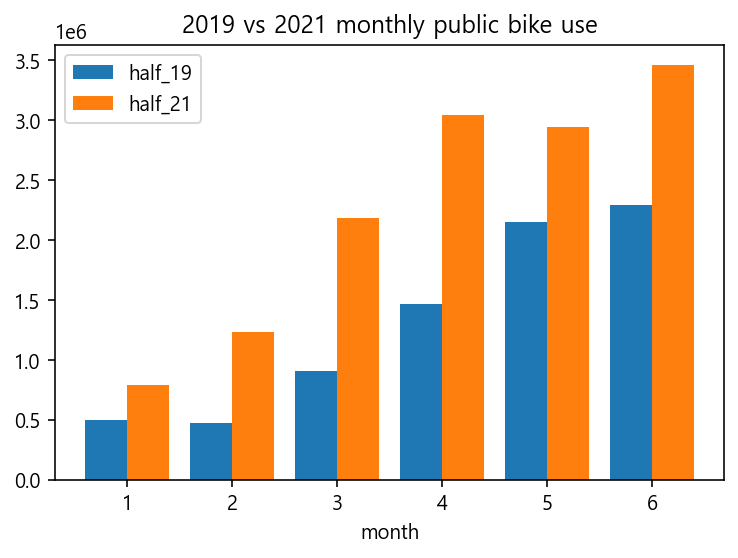

In [60]:
#2019 vs 2021 상반기 월별 공공자전거 이용 변동량
#목적: 지하철, 버스 2019 vs 2021 이용과 비교하기 위해 사용

plt.bar(np.arange(0.8,6.8), bike_2019[:6], label = 'half_19', width = 0.4)
plt.bar(np.arange(1.2,7.2), bike_21, label = 'half_21', width = 0.4)
plt.legend()
plt.title('2019 vs 2021 monthly public bike use')
plt.xlabel('month')
plt.show()

지하철, 버스, 자전거 변동량 상관관계 확인

In [97]:
#버스-지하철 변동량
#버스승차인원 2021년에서 2019년도 빼기
bus_last = us2021-bus2019[:7]

#버스승차인원 2021년에서 2019년도 빼기
subway_last = subway2021-subway2019[:7]

#자전거 이용건수 21년도에서 19년도 데이터 빼기
bike21_19 = bike_21-bike_2019[:6]

In [106]:
#새로운 자전거 데이터프레임
bike_last= bike21_19.to_frame(name="자전거이용건수")
bike_last

,자전거이용건수
월,
1,297033
2,762146
3,1278013
4,1572530
5,797374
6,1164515


In [107]:
subway_last.rename(columns={'승차총승객수':"지하철승차총승객수"},inplace=True)
bus_last.rename(columns={'승차총승객수':"버스승차총승객수"},inplace=True)
bike_last['자전거이용건수'].corr(bus_last['버스승차총승객수'])
bike_last['자전거이용건수'].corr(subway_last['지하철승차총승객수'])
final = pd.concat([bike_last,subway_last,bus_last],axis=1)
#21년도에서 19년도 데이터를 뺀 데이터
final

,자전거이용건수,지하철승차총승객수,버스승차총승객수
월,,,
1,297033.0,-79166560.0,-51959701
2,762146.0,-46824221.0,-30586966
3,1278013.0,-54104678.0,-36054386
4,1572530.0,-57647189.0,-38614619
5,797374.0,-68558287.0,-44874961
6,1164515.0,-41881083.0,-27841716
7,NaN,-69061344.0,-44535347


<AxesSubplot:>

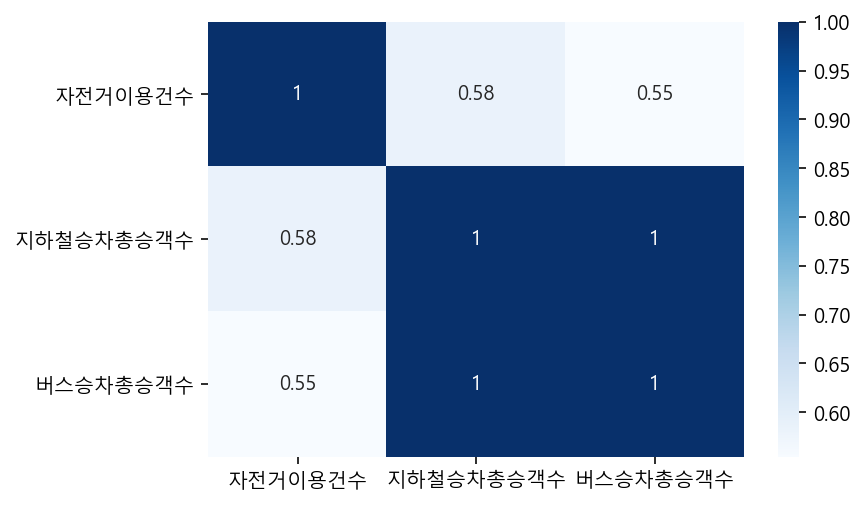

In [112]:
#final 데이터 heatmap으로 시각화
final_co = final.corr()
sns.heatmap(final_co, annot= True, cmap= "Blues")

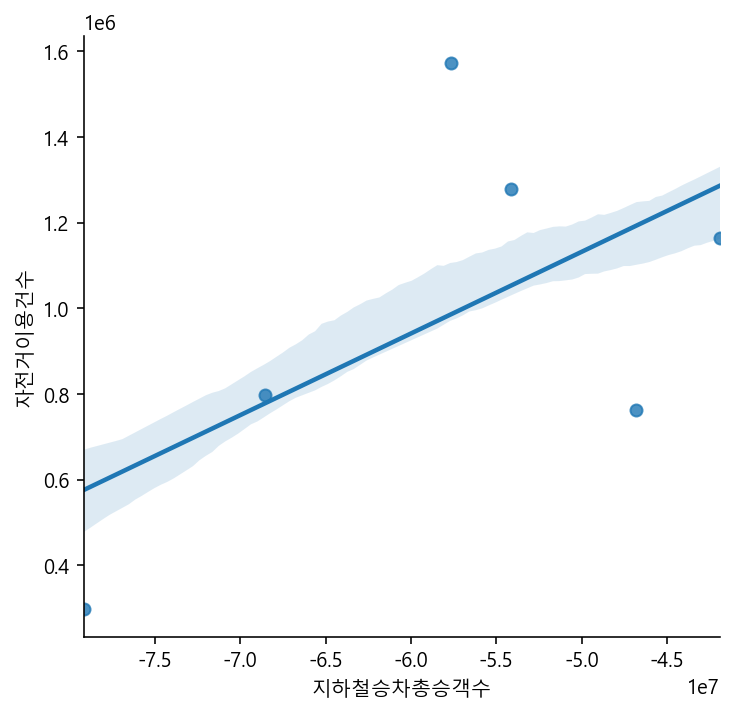

In [113]:
#지하철승객수와 자전거 이용건수 lmplot으로 시각화
sns.lmplot(data=final, x="지하철승차총승객수", y="자전거이용건수",ci=30)

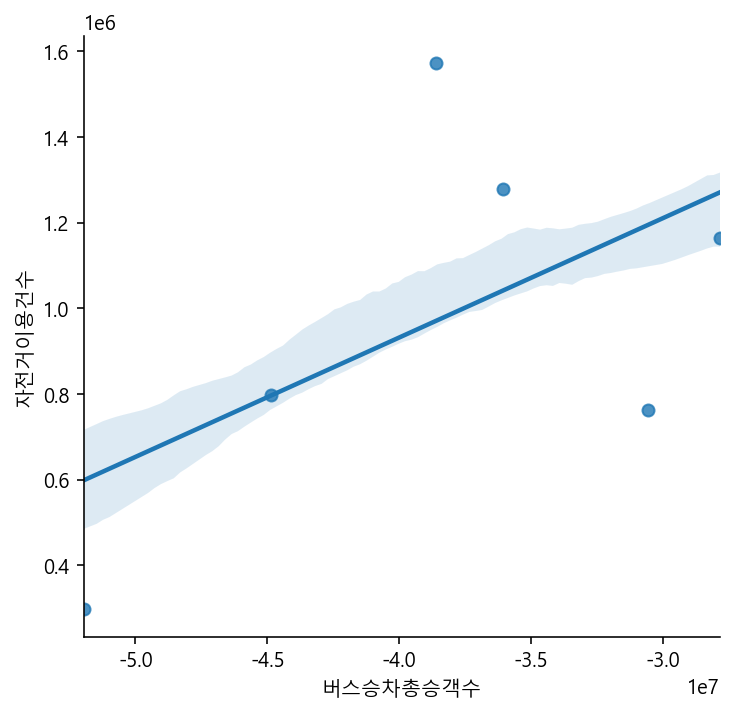

In [114]:
#버스승객수와 자전거이용건수의 lmplot으로 시각화
sns.lmplot(data=final, x="버스승차총승객수", y="자전거이용건수",ci=30)

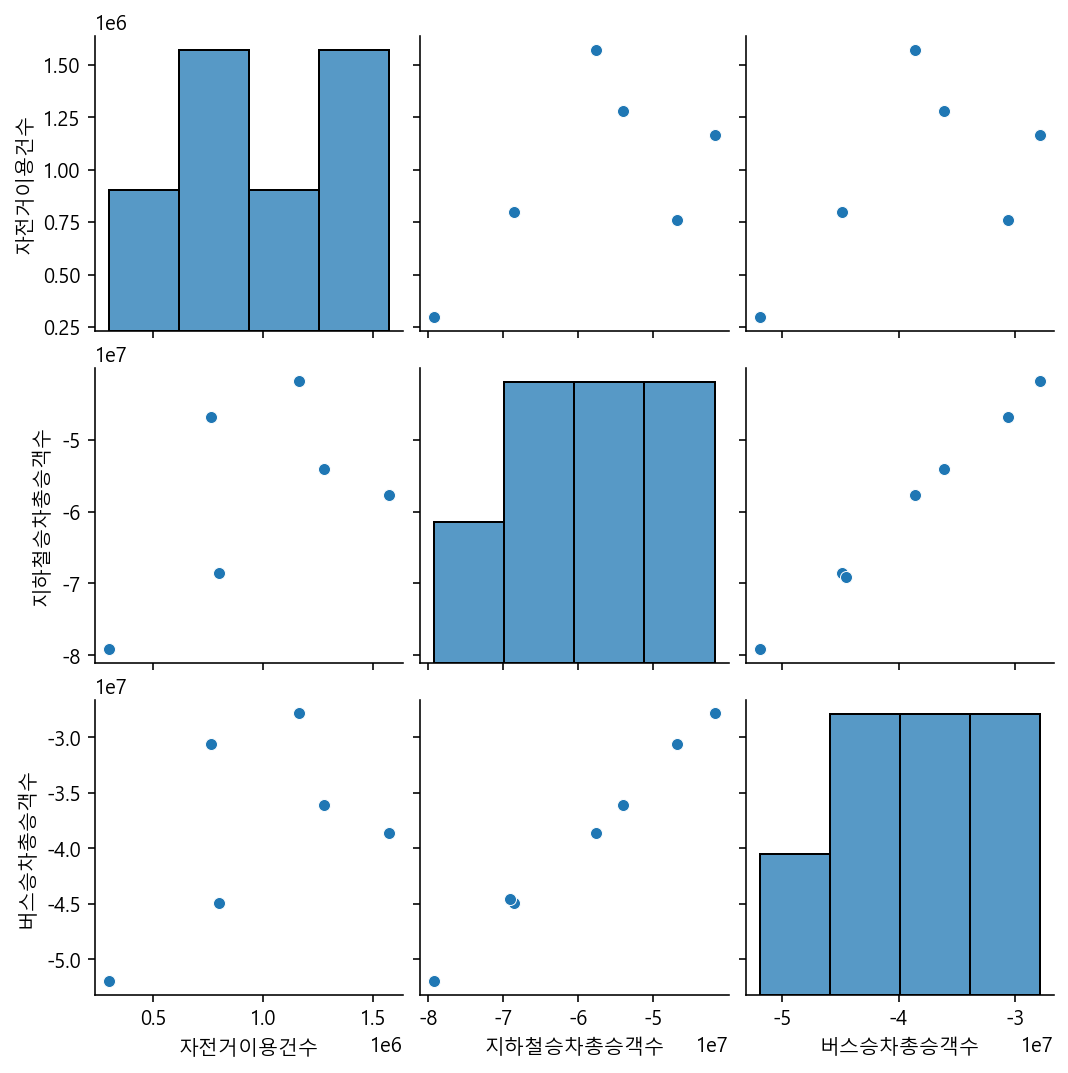

In [115]:
#final 데이터로 pairplot으로 시각화
sns.pairplot(final,kind="scatter",plot_kws=dict(edgecolor="white"))

In [116]:
#####2020끼리 데이터 합치기
#전처리 내용: column명 통일(이용시간, 이동시간), 데이터 형식 통일(대여일자 날짜 형식)
#d2의 column name, 대여일자 데이터 형식이 d3, d4와 다름.
for df in [d2,d3,d4]:
    print(df.columns)
d2.columns = d3.columns #column name 동일하게 만들기
d2.head()

#대여일자 데이터 형식 동일하게 만들기(lambda식 사용)
m_keys = d2['대여일자'].unique()
m_values = ['2020-01','2020-02','2020-03','2020-04','2020-05','2020-06']
dic = dict(zip(m_keys,m_values))
d2['대여일자'] = d2['대여일자'].apply(lambda x: dic[x])
d2.info()


Index(['대여일자', '대여소번호', '대여소명', '대여구분코드', '성별', '연령대코드', '이용건수', '운동량', '탄소량',
       '이동거리', '이용시간'],
      dtype='object')
Index(['대여일자', '대여소번호', '대여소명', '대여구분코드', '성별', '연령대코드', '이용건수', '운동량', '탄소량',
       '이동거리(M)', '이용시간(분)'],
      dtype='object')
Index(['대여일자', '대여소번호', '대여소명', '대여구분코드', '성별', '연령대코드', '이용건수', '운동량', '탄소량',
       '이동거리(M)', '이용시간(분)'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 327231 entries, 0 to 327230
Data columns (total 11 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   대여일자     327231 non-null  object 
 1   대여소번호    327231 non-null  int64  
 2   대여소명     327231 non-null  object 
 3   대여구분코드   327231 non-null  object 
 4   성별       272841 non-null  object 
 5   연령대코드    327231 non-null  object 
 6   이용건수     327231 non-null  int64  
 7   운동량      327231 non-null  object 
 8   탄소량      327231 non-null  object 
 9   이동거리(M)  327231 non-null  float64
 10  이용시간(분)  327231 non-null  int

In [117]:
#2020년 자전거 이용 데이터
df_2020 = pd.concat([d2,d3,d4])
df_2020
#전처리: 필요 없는 column 제거, null값 처리- 0으로 채움

df_2020 = df_2020[['대여일자','대여소번호','연령대코드','이용건수','이동거리(M)','이용시간(분)']]#분석할 column만 추출
df_2020[df_2020['이동거리(M)'].isnull()]
df_2020.fillna(0)
df_2020

,대여일자,대여소번호,연령대코드,이용건수,이동거리(M),이용시간(분)
0,2020-01,3,AGE_003,3,2230.0,75
1,2020-01,3,AGE_004,1,1220.0,15
2,2020-01,3,AGE_005,3,17270.0,53
3,2020-01,5,AGE_005,2,90.0,33
4,2020-01,5,AGE_003,1,196010.0,64
...,...,...,...,...,...,...
532170,2020-12,9999,AGE_006,1,0.0,0
532171,2020-12,9999,AGE_003,2,0.0,76
532172,2020-12,9999,AGE_004,1,0.0,15
532173,2020-12,99999,AGE_008,7,0.0,18


In [118]:
#null()값 처리 확인
df_2020.isnull().sum()

대여일자       0
대여소번호      0
연령대코드      0
이용건수       0
이동거리(M)    0
이용시간(분)    0
dtype: int64

In [119]:
#연령대코드 바꾸기
keys = df_2020.연령대코드.unique()
values = ['10s','20s','30s','40s','50s','60s','70s','etc']
dic = dict(zip(keys,values))

#lambda식 사용해서 연령대코드 직관적으로 바꿈(참고: 서울열린데이터광장 Q&A)
df_2020['연령대코드'] = df_2020.연령대코드.apply(lambda x: dic[x])
df_2020
#월 column, 분기 column 추가
df_2020['월'] = pd.to_datetime(df_2020['대여일자'],format='%Y-%m').dt.month
df_2020['분기'] = pd.to_datetime(df_2020['대여일자'],format='%Y-%m').dt.quarter
df_2020

,대여일자,대여소번호,연령대코드,이용건수,이동거리(M),이용시간(분),월,분기
0,2020-01,3,10s,3,2230.0,75,1,1
1,2020-01,3,20s,1,1220.0,15,1,1
2,2020-01,3,30s,3,17270.0,53,1,1
3,2020-01,5,30s,2,90.0,33,1,1
4,2020-01,5,10s,1,196010.0,64,1,1
...,...,...,...,...,...,...,...,...
532170,2020-12,9999,60s,1,0.0,0,12,4
532171,2020-12,9999,10s,2,0.0,76,12,4
532172,2020-12,9999,20s,1,0.0,15,12,4
532173,2020-12,99999,40s,7,0.0,18,12,4


In [120]:
#2020 자전거 이용자 시각화: bike_2020: 월별 이용건수, bike_Q20: 분기별 이용건수
bike_2020 = df_2020.groupby(['월'])['이용건수'].sum()
df_2020.groupby(['월'])['이용건수'].sum()
bike_Q20 = df_2020.groupby(['분기'])['이용건수'].sum()

In [121]:
#####2019 데이터 통합 전처리

#합치기 전 데이터 통일
#column name 통일(이동거리, 이용거리), 대여일자 데이터 형식 통일(대여일자)
for df in [d1,d10,d11]:
    print(df.columns)
    
d1.columns = d10.columns 

d1['대여일자'] = '2019-12'
d1.head()

Index(['대여일자', '대여소번호', '대여소', '대여구분코드', '성별', '연령대코드', '이용건수', '운동량', '탄소량',
       '이동거리(M)', '이동시간(분)'],
      dtype='object')
Index(['대여일자', '대여소번호', '대여소', '대여구분코드', '성별', '연령대코드', '이용건수', '운동량', '탄소량',
       '이동거리(M)', '이동시간(분)'],
      dtype='object')
Index(['대여일자', '대여소번호', '대여소', '대여구분코드', '성별', '연령대코드', '이용건수', '운동량', '탄소량',
       '이동거리(M)', '이동시간(분)'],
      dtype='object')


,대여일자,대여소번호,대여소,대여구분코드,성별,연령대코드,이용건수,운동량,탄소량,이동거리(M),이동시간(분)
0,2019-12,3,중랑센터,일일(회원),M,AGE_003,7,1208.87,10.11,43610,118
1,2019-12,3,중랑센터,일일(회원),M,AGE_004,2,0,0,0,10
2,2019-12,3,중랑센터,정기,M,AGE_005,5,110.02,1.03,4410,99
3,2019-12,5,상암센터 정비실,일일(회원),\N,AGE_005,1,0,0,0,8
4,2019-12,5,상암센터 정비실,일일(회원),M,AGE_004,5,427.8,3.92,16880,205


In [122]:
#2019년 데이터 통합, null 값 확인
df_2019 = pd.concat([d1,d10,d11])
df_2019 = df_2019[['대여일자','대여소번호','연령대코드','이용건수','이동거리(M)','이동시간(분)']]
df_2019
df_2019[df_2019['이동거리(M)'].isnull()]
df_2019.isnull().sum()

대여일자       0
대여소번호      0
연령대코드      0
이용건수       0
이동거리(M)    0
이동시간(분)    0
dtype: int64

In [123]:
#연령대 코드 직관적으로 변경-labmda식 사용
keys = df_2019.연령대코드.unique()
values = ['10s','20s','30s','40s','50s','60s','70s','etc']
dic = dict(zip(keys,values))
dic
df_2019['연령대코드'] = df_2019.연령대코드.apply(lambda x: dic[x])
df_2019

,대여일자,대여소번호,연령대코드,이용건수,이동거리(M),이동시간(분)
0,2019-12,3,10s,7,43610,118
1,2019-12,3,20s,2,0,10
2,2019-12,3,30s,5,4410,99
3,2019-12,5,30s,1,0,8
4,2019-12,5,20s,5,16880,205
...,...,...,...,...,...,...
336816,2019-11,9998,20s,8,7910,86
336817,2019-11,99998,30s,2,0,0
336818,2019-11,99999,50s,6,48460,71
336819,2019-11,99999,20s,10,50680,161


In [124]:
#월별, 분기별 column 추가
#bike_2019: 2019년 월별 공공자전거 이용횟수, bike_Q19: 2019년 분기별 공공자전거 이용횟수

df_2019['월'] = pd.to_datetime(df_2019['대여일자'],format='%Y-%m').dt.month
df_2019['분기'] = pd.to_datetime(df_2019['대여일자'],format='%Y-%m').dt.quarter
bike_2019 = df_2019.groupby(['월'])['이용건수'].sum()
df_2019.groupby(['월'])['이용건수'].sum()

bike_Q19 = df_2019.groupby(['분기'])['이용건수'].sum()

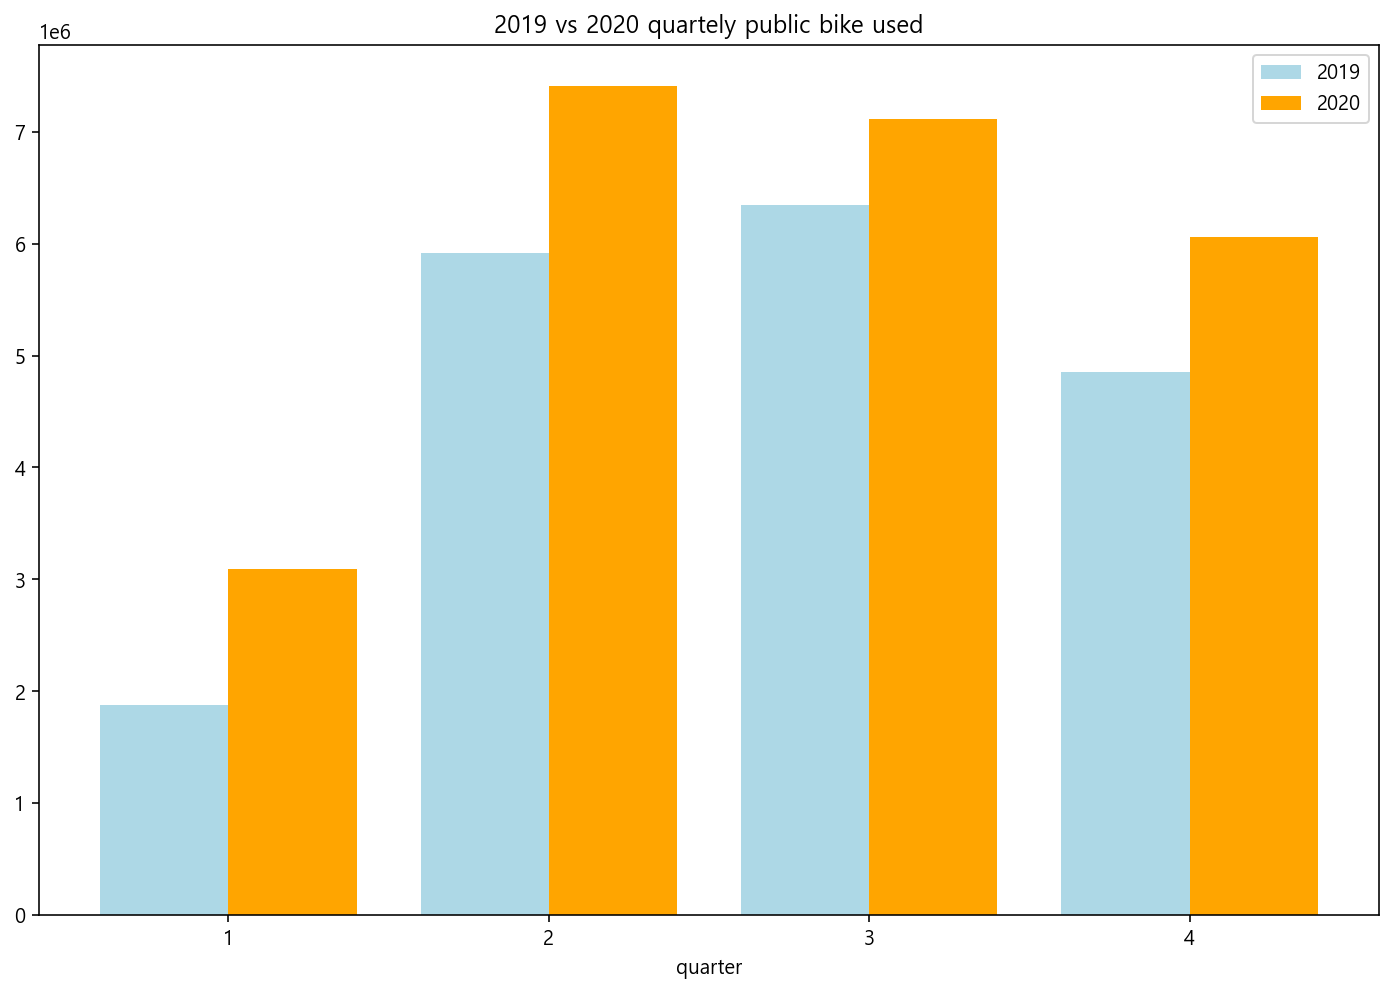

In [125]:
#2019 vs 2020 분기별 공공자전거 이용 횟수
plt.figure(figsize=(12,8))
plt.title('2019 vs 2020 quartely public bike used')
plt.bar(np.arange(0.8,4.8),  bike_Q19, width = 0.4, label = '2019', color='lightblue')
plt.bar(np.arange(1.2,5.2),bike_Q20, width = 0.4, label = '2020', color = 'orange' )
plt.xlabel('quarter')
plt.xticks(np.arange(1,5))
plt.legend()
plt.show()

In [126]:
#2020 사용자의 연령별 분포 확인

df_2020.head()
count_20 = df_2020.groupby(['연령대코드'])['이용건수'].sum()
driven_20 = df_2020.groupby(['연령대코드'])['이동거리(M)'].mean()

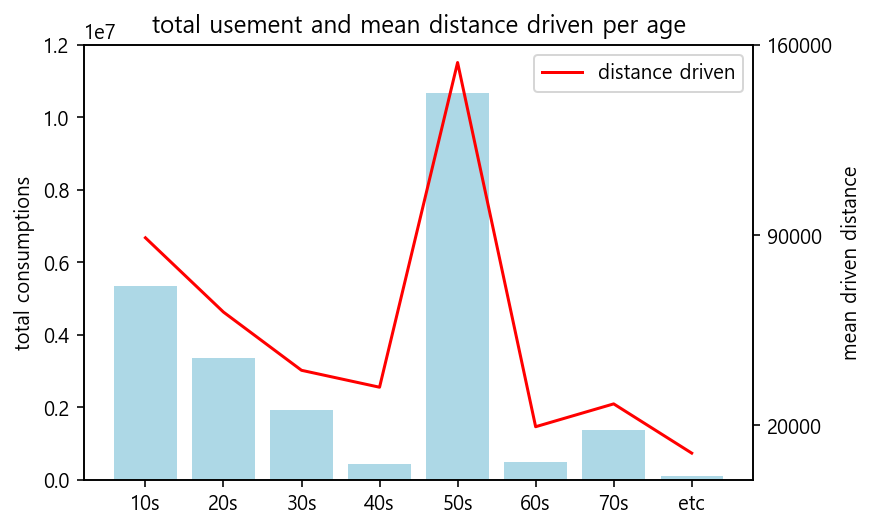

In [127]:
#연령대별 자전거 이용 횟수 & 횟수별 이동 평균 거리(km)

fig, ax1 = plt.subplots()
ax2 = ax1.twinx()

bar = ax1.bar(df_2020['연령대코드'].unique(), count_20, label = 'count', color = 'lightblue')
plot = ax2.plot(driven_20, label = 'distance driven', color='red')
ax1.set_ylabel('total consumptions')
ax1.set_ylim(0,12000000)
ax2.set_ylabel('mean driven distance')
ax2.set_ylim(0, 160000)
ax2.set_yticks([20000,90000,160000])
plt.legend()
plt.title('total usement and mean distance driven per age')
plt.show()

In [128]:
#2017-2020 교통사고 데이터 확인

taas1 = pd.read_csv('교통사고1720_taas/서울시 자전거 교통사고_피해자_2020.csv', encoding='utf-8')
taas2 = pd.read_csv('교통사고1720_taas/서울시 자전거 교통사고_피해자_2017_2019.csv', encoding='utf-8')

In [129]:
#2017-2020 dataset 합침

taas = pd.concat([taas1, taas2])
taas['월'] = [dt.strptime(taas.사고일시.iloc[i], "%Y년 %m월 %d일 %H시").month for i in range(len(taas))]
taas.head()
taas['월'].unique()
taas['년'] = [dt.strptime(taas.사고일시.iloc[i], "%Y년 %m월 %d일 %H시").year for i in range(len(taas))]
#활용 가능한 column만 추출

taas = taas[['사고번호', '요일', '시군구', '노면상태', '기상상태', '가해운전자 성별', '가해운전자 연령', '피해운전자 성별', '피해운전자 연령', '피해운전자 상해정도', '월', '년']]
taas.head()

,사고번호,요일,시군구,노면상태,기상상태,가해운전자 성별,가해운전자 연령,피해운전자 성별,피해운전자 연령,피해운전자 상해정도,월,년
0,2020010100100101,수요일,서울특별시 강동구 성내동,포장 - 건조,흐림,남,43세,남,76세,경상,1,2020
1,2020010200100312,목요일,서울특별시 송파구 잠실동,포장 - 건조,맑음,여,47세,남,64세,중상,1,2020
2,2020010200100341,목요일,서울특별시 송파구 풍납동,포장 - 건조,맑음,남,22세,여,53세,경상,1,2020
3,2020010400100045,토요일,서울특별시 중랑구 상봉동,포장 - 건조,흐림,여,34세,남,52세,중상,1,2020
4,2020010400100306,토요일,서울특별시 광진구 자양동,포장 - 건조,맑음,남,64세,여,20세,상해없음,1,2020


In [130]:
#피해운전자 연령 숫자로 변환 및 null값 처리(행 삭제)

taas['피해운전자 연령'] = taas['피해운전자 연령'].str.extract('(\d+)')
taas.isnull().sum()
taas = taas.dropna()
taas.isnull().sum() #null값 제거

사고번호          0
요일            0
시군구           0
노면상태          0
기상상태          0
가해운전자 성별      0
가해운전자 연령      0
피해운전자 성별      0
피해운전자 연령      0
피해운전자 상해정도    0
월             0
년             0
dtype: int64

In [131]:
#교통사고 피해자 나이 구간별 지정 함수
def ages(age):
    age = int(age)
    if age>=80: return 'etc'
    elif age>=70: return '70s'
    elif age>=60: return '60s'
    elif age>=50: return '50s'
    elif age>=40: return '40s'
    elif age>=30: return '30s'
    elif age>=20: return '20s'
    else: return '10s'
taas['피해운전자 연령'] = taas['피해운전자 연령'].apply(ages)

<BarContainer object of 8 artists>

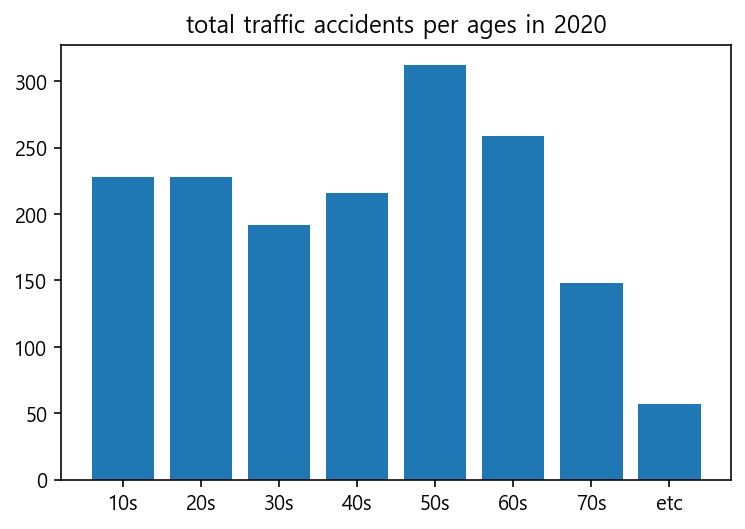

In [132]:
# 2020년 연령별 교통사고
age_20 = taas[taas['년']==2020].groupby(['피해운전자 연령'])['사고번호'].count()
agelist = df_2020['연령대코드'].unique()
plt.title('total traffic accidents per ages in 2020')
plt.bar(agelist, age_20)

In [135]:
#2020년 50대 월별 교통사고

taas20 = taas[taas['년']==2020]
age50s_20 = taas20[taas20['피해운전자 연령']=='50s'].groupby(['월'])['사고번호'].count()
#month_20: 월별 교통사고,
month_20 = taas[taas['년']==2020].groupby(['월']).count()['사고번호']

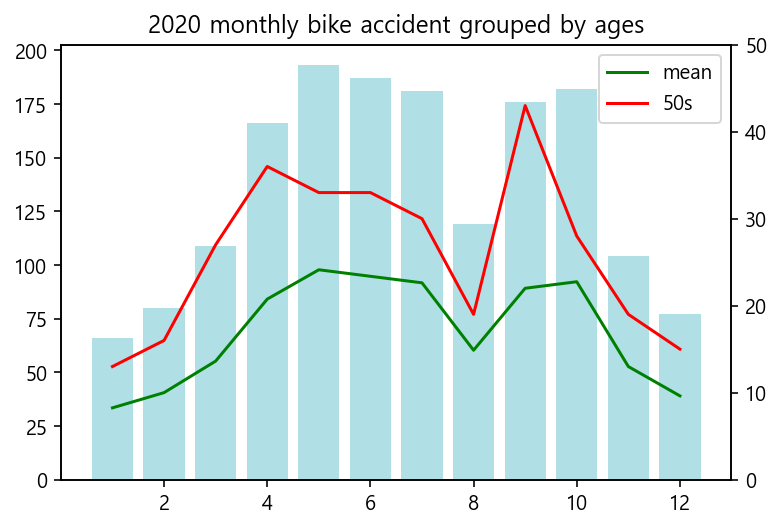

In [138]:
#2020 월별 연령대 사고 정보
fig, ax1 = plt.subplots()
ax2 = ax1.twinx()

#총 사고 횟수
ax1.bar(range(1,13), month_20, label='total accident', color = 'powderblue')

#월별 연령대 평균 사고 vs 월별 50대 사고
age_mean = taas[taas['년']==2020].groupby(['월'])['사고번호'].count()/len(agelist)

ax2.plot(range(1,13), age_mean, label='mean', color = 'g')
ax2.plot(range(1,13), age50s_20, label='50s', color='red')
ax2.set_ylim(0,50)
plt.title('2020 monthly bike accident grouped by ages')
plt.legend()
plt.show()

In [142]:
#taas18, taas19: 각각 2018, 2019 교통사고 데이터
#month_18, month_19: 각 년도 월별 사고 횟수

taas19 = taas[taas['년']==2019]
taas18 = taas[taas['년']==2018]

month_18 = taas18.groupby(['월'])['사고번호'].count()
month_19 = taas19.groupby(['월'])['사고번호'].count()

Text(0.5, 1.0, '2018 vs 2020 total severe injury from bike accident')

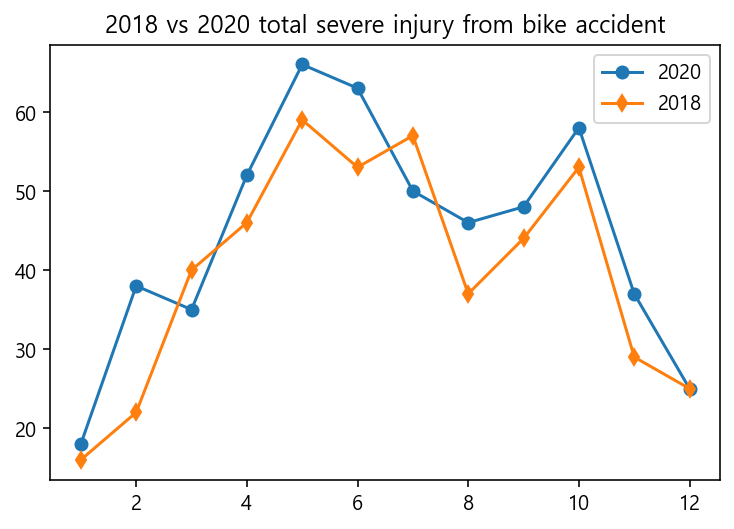

In [143]:
#2018 vs 2020 월별 중상+사망 교통사고 횟수
#중상+사망 그래프만 가져옴
#heavy18, 20: 2018, 2020년 교통사고 피해자 중 상해정도= '중상'
#death18, 20: 2018, 2020년 교통사고 피해자 중 상해정도= '사망'

taas['피해운전자 상해정도'].unique()
heavy20 = taas20[taas20['피해운전자 상해정도']=='중상'].groupby('월')['사고번호'].count()
death20 = taas20[taas20['피해운전자 상해정도']=='사망'].groupby('월')['사고번호'].count()
injury = heavy20.add(death20, fill_value=0)

heavy18 = taas18[taas18['피해운전자 상해정도']=='중상'].groupby('월')['사고번호'].count()
death18 = taas18[taas18['피해운전자 상해정도']=='사망'].groupby('월')['사고번호'].count()
injury18 = heavy18.add(death18, fill_value=0)

plt.plot(injury, marker='o', label='2020')
plt.plot(injury18, marker='d', label='2018')
plt.legend()
plt.title('2018 vs 2020 total severe injury from bike accident')

##4. 자전거 도로 확충 필요성 주장

In [144]:
#19년도 자전거 교통사고 데이터 출력 및 필요한 컬럼 출력
traffic19 = pd.read_csv("data\\자전거교통사고(2019).csv",encoding= 'euc_kr')
traffic19=traffic19[["지역","자전거 가해자사고"]]
traffic19

#20년도 자전거 교통사고 데이터 출력 및 필요한 컬럼 출력
traffic20 = pd.read_csv("data\\자전거교통사고(2020).csv",encoding= 'euc_kr')
traffic20 = traffic20[["지역","자전거 가해자사고"]]
traffic20

,지역,자전거 가해자사고
0,종로구,20
1,중구,20
2,용산구,18
3,성동구,93
4,광진구,45
5,동대문구,114
6,중랑구,114
7,성북구,40
8,강북구,38
9,도봉구,57


In [145]:
#19년도 및 20년도 자전거 사고 데이터 합친 후 컬럼명 변환
traffic19["20년 자전거 가해자사고"]=traffic20["자전거 가해자사고"]
traffic19=traffic19.rename(columns={"자전거 가해자사고":"19년 자전거 가해자사고"})
#자료형 확인
traffic19.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   지역             25 non-null     object
 1   19년 자전거 가해자사고  25 non-null     int64 
 2   20년 자전거 가해자사고  25 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 728.0+ bytes


In [146]:
#19년도와 20년도의 사고자 데이터 차이 출력 및 새로운 컬럼명으로 지정
traffic19["사고자 차이"] = traffic19["20년 자전거 가해자사고"] - traffic19["19년 자전거 가해자사고"]
traffic19

,지역,19년 자전거 가해자사고,20년 자전거 가해자사고,사고자 차이
0,종로구,19,20,1
1,중구,23,20,-3
2,용산구,22,18,-4
3,성동구,63,93,30
4,광진구,61,45,-16
5,동대문구,110,114,4
6,중랑구,99,114,15
7,성북구,37,40,3
8,강북구,57,38,-19
9,도봉구,62,57,-5


In [148]:
#19년도 자전거도로데이터 필요한 컬럼 가져온 후 - 값을 0값으로 치환  
bicycle19 = pd.read_csv("data\\자전거도로(2019).csv",encoding= 'UTF8')
bicycle19 = bicycle19[["자치구(2)","자전거전용도로"]]
bicycle19=bicycle19.replace({"-":0})
bicycle19

#20년도 자전거도로데이터 필요한 컬럼 가져온 후 -값을 0값으로 치환
bicycle20 = pd.read_csv("data\\자전거도로(2020).csv",encoding= 'UTF8')
bicycle20 = bicycle20[["자치구(2)","자전거전용도로"]]
bicycle20=bicycle20.replace({"-":0})
bicycle20

,자치구(2),자전거전용도로
0,종로구,0
1,중구,0
2,용산구,5
3,성동구,1
4,광진구,1
5,동대문구,4
6,중랑구,7
7,성북구,5
8,강북구,0
9,도봉구,2


In [149]:
#19년도 자전거전용도로와 20년도 자전거전용도로를 한 데이터안에 각각 출력
#컬럼명을 구분하기 쉽게 변환
bicycle19["20년 자전거 전용도로구간"]=bicycle20["자전거전용도로"]
bicycle19=bicycle19.rename(columns={"자전거전용도로":"19년 자전거 전용도로구간"})
bicycle19

,자치구(2),19년 자전거 전용도로구간,20년 자전거 전용도로구간
0,종로구,0,0
1,중구,0,0
2,용산구,3,5
3,성동구,2,1
4,광진구,1,1
5,동대문구,3,4
6,중랑구,4,7
7,성북구,1,5
8,강북구,0,0
9,도봉구,1,2


In [150]:
#문자형 자료형을 정수형 자료형으로 변환
bicycle19["19년 자전거 전용도로구간"]=pd.to_numeric(bicycle19["19년 자전거 전용도로구간"],errors="coerce")
bicycle19["20년 자전거 전용도로구간"]=pd.to_numeric(bicycle19["20년 자전거 전용도로구간"],errors="coerce")
bicycle19.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   자치구(2)          25 non-null     object
 1   19년 자전거 전용도로구간  25 non-null     int64 
 2   20년 자전거 전용도로구간  25 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 728.0+ bytes


In [151]:
#19년 자전거전용도로 및 20년 자전거전용도로의 차이를 새로운 컬럼며으로 추가
bicycle19["구간차이"] = bicycle19["20년 자전거 전용도로구간"] - bicycle19["19년 자전거 전용도로구간"]
bicycle19

,자치구(2),19년 자전거 전용도로구간,20년 자전거 전용도로구간,구간차이
0,종로구,0,0,0
1,중구,0,0,0
2,용산구,3,5,2
3,성동구,2,1,-1
4,광진구,1,1,0
5,동대문구,3,4,1
6,중랑구,4,7,3
7,성북구,1,5,4
8,강북구,0,0,0
9,도봉구,1,2,1


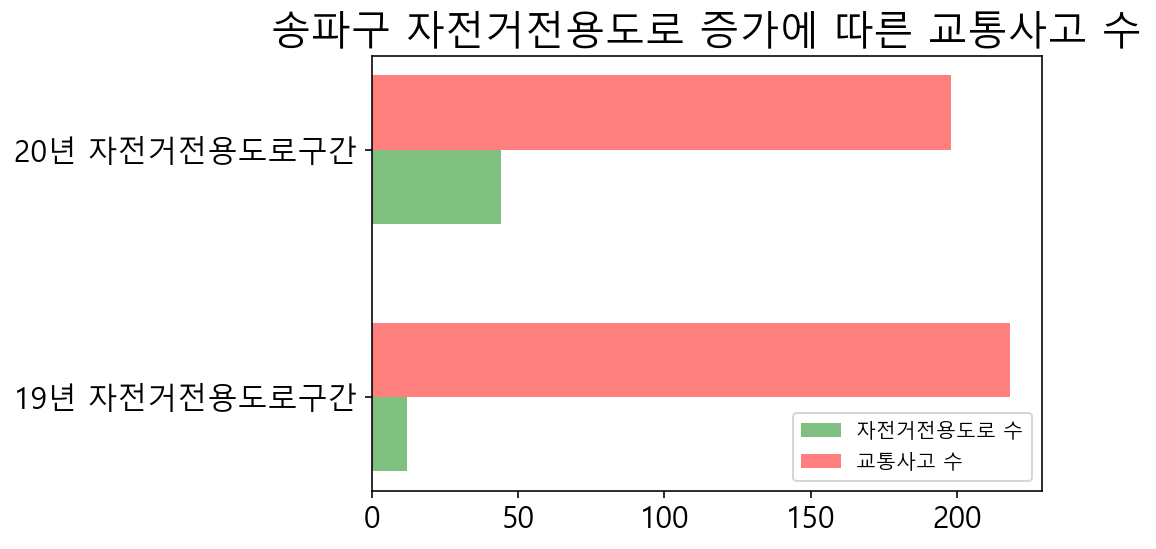

In [152]:
#1년간 사고자가 가장 많이 감소한 송파구를 대상으로 자전거전용도로 구간 및 교통사고 수 시각화
labels = ["19년 자전거전용도로구간","20년 자전거전용도로구간"]

x = np.arange(len(labels))

count_1 = [12,44]
count_2 = [218,198]

width = 0.3

fig,axes = plt.subplots()
axes.barh(x-width/2,count_1,width,align="center",color="green",alpha=0.5)
axes.barh(x+width/2,count_2,width,align="center",color="red",alpha=0.5)

plt.xticks(fontsize = 15)
plt.yticks(x)
axes.set_yticklabels(labels,fontsize=15)
plt.title("송파구 자전거전용도로 증가에 따른 교통사고 수",fontsize=20)
plt.legend(["자전거전용도로 수","교통사고 수"])
plt.show()

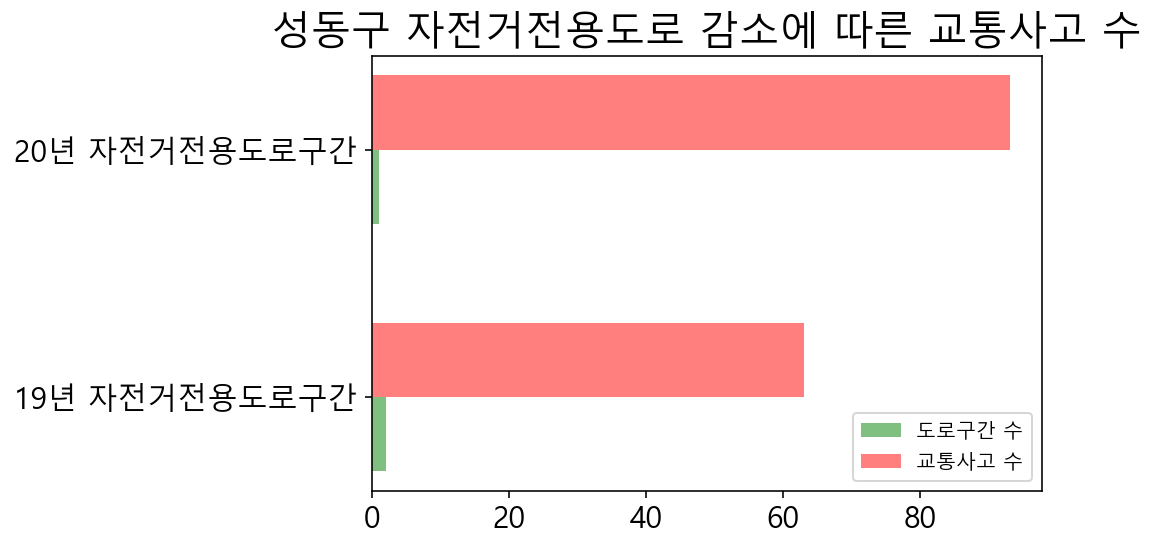

In [153]:
#1년간 자전거전용도로를 감소시킨 성동구를 대상으로 자전거전용도로 구간 및 교통사고 수 시각화 
labels = ["19년 자전거전용도로구간","20년 자전거전용도로구간"]

x = np.arange(len(labels))

count_1 = [2,1]
count_2 = [63,93]

width = 0.3

fig,axes = plt.subplots()
axes.barh(x-width/2,count_1,width,align="center",color="green",alpha=0.5)
axes.barh(x+width/2,count_2,width,align="center",color="red",alpha=0.5)

plt.xticks(fontsize = 15)
plt.yticks(x)
axes.set_yticklabels(labels,fontsize=15)
plt.title("성동구 자전거전용도로 감소에 따른 교통사고 수",fontsize=20)
plt.legend(["도로구간 수","교통사고 수"])
plt.show()